In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.linalg import lu_factor, lu_solve
import pandas as pd

import scipy
import math

# Lista 2 - Exercício 4

A função deve ser uma equação linear, do primeiro grau. <br>

Tomando como base: $$ g(x) = 4x + 5,   x_{0} = 0 $$
Fazendo a primeira iteração:
$$ g(x_{0}) = 4*0 + 5 = 5 $$
$$ g'(x_{0}) = 4 $$
$$ \Delta x = \frac{- g(x_{0})}{g'(x_{0})}  = \frac{-5}{4} $$
$$ x_{1} = x_{1} + \Delta x = 0 + \frac{- 4}{5} = \frac{-5}{4} $$
$$ g(x_{1}) = 4*\frac{-5}{4} + 5 = 0 $$

# Lista 3 - Exercício 5

## a)

$$ J = \frac{\partial g}{\partial x, y} = 
\left(\begin{array}{cc} 
\frac{\partial g_{1}}{\partial x} & \frac{\partial g_{1}}{\partial y}\\
\frac{\partial g_{2}}{\partial x} & \frac{\partial g_{2}}{\partial y}
\end{array}\right) =
\left(\begin{array}{cc} 
2x - 2 & -1\\ 
1 & -1
\end{array}\right)
$$ 

## b)

In [2]:
x = [-1.5, -1.5]
    
convergencia = True

r = 0

J = np.zeros((2,2))

J[0,0] = 2*x[0] - 2 
J[0,1] = -1
J[1,0] = 1
J[1,1] = -1

i, j = J.shape

g = np.zeros((j))
delta = np.zeros((j))

g_view_1 = np.array(x[0]**2 - 2*x[0] - 1 - x[1])
g_view_2 = np.array(x[0] + 3 - x[1])

x_view_1 = np.array(x[0])
x_view_2 = np.array(x[1])

d_view_1 = list()
d_view_2 = list()

e = 0.0001
    
while r < 10:
    
    g[0] = x[0]**2 - 2*x[0] - 1 - x[1]
    g[1] = x[0] + 3 - x[1]

    if r > 0:    
        g_view_1 = np.vstack([g_view_1, g[0]])
        g_view_2 = np.vstack([g_view_2, g[1]])
        
        x_view_1 = np.vstack([x_view_1, x[0]])
        x_view_2 = np.vstack([x_view_2, x[1]])
    
    if max(abs(g)) <= e:
        
        d_view_1.append(0)
        d_view_2.append(0)
        
        break
    
    else:
        
        J[0,0] = 2*x[0] - 2
        
        LU, P = lu_factor(J)
        
        DV = lu_solve((LU, P), g)
        
        delta = - DV
        
        d_view_1.append(delta[0])
        d_view_2.append(delta[1])
        
        x += delta
        
        r += 1
        
d_view_1 = np.array(d_view_1).T
d_view_2 = np.array(d_view_2).T

In [3]:
decimals = 5

df = pd.DataFrame(data=g_view_1.round(decimals = decimals), columns=["g1"])
df["g2"] = g_view_2.round(decimals = decimals)
df["X"] = x_view_1.round(decimals = decimals)
df["Delta X"] = d_view_1.round(decimals = decimals)
df["Y"] = x_view_2.round(decimals = decimals)
df["Delta Y"] = d_view_2.round(decimals = decimals)

df

,g1,g2,X,Delta X,Y,Delta Y
0,5.75000,3.0,-1.50000,0.45833,-1.50000,3.45833
1,0.21007,-0.0,-1.04167,0.04133,1.95833,0.04133
2,0.00171,0.0,-1.00034,0.00034,1.99966,0.00034
3,0.00000,0.0,-1.00000,0.00000,2.00000,0.00000


## c)

In [4]:
x = [5, 5]
    
convergencia = True

r = 0

J = np.zeros((2,2))

J[0,0] = 2*x[0] - 2 
J[0,1] = -1
J[1,0] = 1
J[1,1] = -1

i, j = J.shape

g = np.zeros((j))
delta = np.zeros((j))

g_view_1 = np.array(x[0]**2 - 2*x[0] - 1 - x[1])
g_view_2 = np.array(x[0] + 3 - x[1])

x_view_1 = np.array(x[0])
x_view_2 = np.array(x[1])

d_view_1 = list()
d_view_2 = list()

e = 0.0001
    
while r < 10:
    
    g[0] = x[0]**2 - 2*x[0] - 1 - x[1]
    g[1] = x[0] + 3 - x[1]

    if r > 0:    
        g_view_1 = np.vstack([g_view_1, g[0]])
        g_view_2 = np.vstack([g_view_2, g[1]])
        
        x_view_1 = np.vstack([x_view_1, x[0]])
        x_view_2 = np.vstack([x_view_2, x[1]])
    
    if max(abs(g)) <= e:
        
        d_view_1.append(0)
        d_view_2.append(0)
        
        break
    
    else:
        
        J[0,0] = 2*x[0] - 2
        
        LU, P = lu_factor(J)
        
        DV = lu_solve((LU, P), g)
        
        delta = - DV
        
        d_view_1.append(delta[0])
        d_view_2.append(delta[1])
        
        x += delta
        
        r += 1
        
d_view_1 = np.array(d_view_1).T
d_view_2 = np.array(d_view_2).T

In [5]:
decimals = 5

df = pd.DataFrame(data=g_view_1.round(decimals = decimals), columns=["g1"])
df["g2"] = g_view_2.round(decimals = decimals)
df["X"] = x_view_1.round(decimals = decimals)
df["Delta X"] = d_view_1.round(decimals = decimals)
df["Y"] = x_view_2.round(decimals = decimals)
df["Delta Y"] = d_view_2.round(decimals = decimals)

df

,g1,g2,X,Delta X,Y,Delta Y
0,9.00000,3.0,5.00000,-0.85714,5.00000,2.14286
1,0.73469,0.0,4.14286,-0.13900,7.14286,-0.13900
2,0.01932,0.0,4.00386,-0.00386,7.00386,-0.00386
3,0.00001,0.0,4.00000,0.00000,7.00000,0.00000


## d)

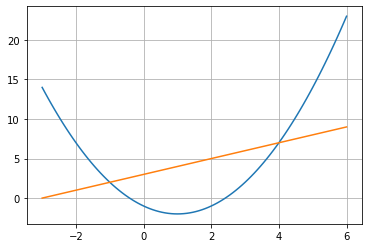

In [6]:
x = np.linspace(-3,6,100)

y1 = x**2 - 2*x - 1
y2 = x + 3

plt.plot(x, y1, x, y2)
plt.grid(True)

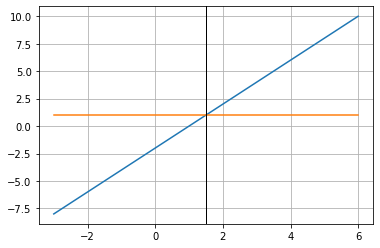

In [7]:
x = np.linspace(-3,6,100)

y1 = x*2 - 2
y2 = 1 + 0*x

plt.plot(x, y1, x, y2)
plt.axvline(1.5, -10, 10, color='k', linewidth=1)
plt.grid(True)

In [8]:
x = [1.5, -1]
    
convergencia = True

r = 0

J = np.zeros((2,2))

J[0,0] = 2*x[0] - 2 
J[0,1] = -1
J[1,0] = 1
J[1,1] = -1

i, j = J.shape

g = np.zeros((j))
delta = np.zeros((j))

g_view_1 = np.array(x[0]**2 - 2*x[0] - 1 - x[1])
g_view_2 = np.array(x[0] + 3 - x[1])

x_view_1 = np.array(x[0])
x_view_2 = np.array(x[1])

d_view_1 = list()
d_view_2 = list()

e = 0.0001
    
while r < 70:
    
    g[0] = x[0]**2 - 2*x[0] - 1 - x[1]
    g[1] = x[0] + 3 - x[1]

    if r > 0:    
        g_view_1 = np.vstack([g_view_1, g[0]])
        g_view_2 = np.vstack([g_view_2, g[1]])
        
        x_view_1 = np.vstack([x_view_1, x[0]])
        x_view_2 = np.vstack([x_view_2, x[1]])
    
    if max(abs(g)) <= e:
        
        d_view_1.append(0)
        d_view_2.append(0)
        
        break
    
    else:
        
        J[0,0] = 2*x[0] - 2
        
        LU, P = lu_factor(J)
        
        DV = lu_solve((LU, P), g)
        
        delta = - DV
        
        d_view_1.append(delta[0])
        d_view_2.append(delta[1])
        
        x += delta
        
        r += 1
        
d_view_1 = np.array(d_view_1).T
d_view_2 = np.array(d_view_2).T

decimals = 5

df = pd.DataFrame(data=g_view_1.round(decimals = decimals), columns=["g1"])
df["g2"] = g_view_2.round(decimals = decimals)
df["X"] = x_view_1.round(decimals = decimals)
df["Delta X"] = d_view_1.round(decimals = decimals)
df["Y"] = x_view_2.round(decimals = decimals)
df["Delta Y"] = d_view_2.round(decimals = decimals)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: LinAlgWarning: Diagonal number 2 is exactly zero. Singular matrix.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


ValueError: ignored

Obtendo as derivadas das funções g1 e g2 pode-se obter as regiões de convergência e não-convergência, as derivadas encontradas foram: <br><br>
$$ \frac{\partial y_{1}}{\partial x} = 2*x - 2 $$
$$ \frac{\partial y_{2}}{\partial x} = 1 $$
<br>Igualando ambas, obtém-se x = 1.5, para quaisquer valores de y, que forme o par (1.5, y), não haverá convergência, pois, para esse valor de x a matriz jacobiana tem o determinante igual a 0, vale lembrar a propriedade matemática que diz que uma matriz só pode possui uma inversa se o determinante for diferente de 0. <br><br>

Além disso, a partir do gráfico ou do ponto x=1.5, é possível saber se o algoritmo irá convergir para (-1,2) ou (4,7).<br><br>
1) Com base no gráfico, para os valores à esquerda do ponto x=1.5 (demarcado pela linha preta) os pares irão convergir para (-1,2). Enquanto que para os valores a direita dessa linha, os valores irão convrgir para (4,7) <br><br>
2) Tomando como base o valor de x=1.5, para valores de x inferiores a ele e independente do valor de y, o gráfico irá convergir para (-1,2). Enquanto que para valores maiores do que 1.5 e independente do valor de y, o gráfico irá convergir para (4,7)

## e)

Primeiramente, deve-se calcular:
$$
[J(x^{(v)})]^{-1}
$$


$$
\left(\begin{array}{cc} 
2x - 2 & -1\\ 
1 & -1
\end{array}\right) *
\left(\begin{array}{cc} 
A & C\\ 
B & D
\end{array}\right) =
\left(\begin{array}{cc} 
1 & 0\\ 
0 & 1
\end{array}\right)
$$

$$
[J(x^{(v)})]^{-1} = 
\left(\begin{array}{cc} 
\frac{1}{2x-3} & \frac{-1}{2x-3}\\
\frac{1}{2x-3} & \frac{-2x+2}{2x-3}
\end{array}\right)
$$

<br><br><br>
Em seguida, deve-se calcular: 
$$ \Delta x =
- [\frac{1}{2x-3} * g_{1}(x^{(v)}) + \frac{-1}{2x-3} * g_{2}(x^{(v)})]$$

$$ \Delta x = -
\frac{x^2-3x-4}{2x-3}$$
<br><br><br>
Com a equação abaixo:
$$ x^{(v+1)} = x^{(v)} + \Delta x^{(v)}$$
<br><br><br>
Obtendo:
$$ 1,5 = x + \frac{-x^2+3x+4}{2x-3}$$
<br><br><br>
Resolvendo:
$$ x^2-3x+0,5 = 0$$
$$ x_{1} = 1.5-j2.5$$
$$ x_{2} = 1.5+j2.5$$

<br><br><br>
Como x e y estão definidos apenas para os valores reais, não existe a possibilidade de que, no decorrer do processo iterativo, o ponto Rc seja atingido.

## f)

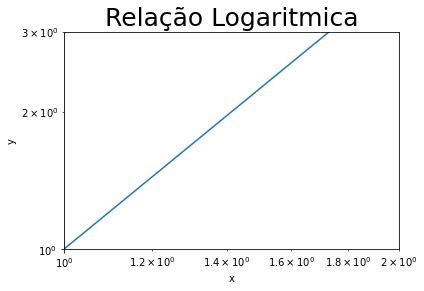

In [9]:
x = np.linspace(0,2,100)
k = 1
y = k*x**2
plt.plot(x, y)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([1,2])
plt.ylim([1,3])
plt.title("Relação Logaritmica",fontsize=25)
plt.grid(True)

plt.show()

In [10]:
X1 = math.log10(80)
X2 = math.log10(20)
Y1 = 2*X1 + math.log10(k)
Y2 = 2*X2 + math.log10(k)
m = (Y2-Y1)/(X2-X1)
m

2.0

In [11]:
x = [0, 0]
    
convergencia = True

r = 0

J = np.zeros((2,2))

J[0,0] = 2*x[0] - 2 
J[0,1] = -1
J[1,0] = 1
J[1,1] = -1

i, j = J.shape

g = np.zeros((j))
delta = np.zeros((j))

g_view_1 = np.array(x[0]**2 - 2*x[0] - 1 - x[1])
g_view_2 = np.array(x[0] + 3 - x[1])

x_view_1 = np.array(x[0])
x_view_2 = np.array(x[1])

d_view_1 = list()
d_view_2 = list()

e = 0.0001
    
while r < 70:
    
    g[0] = x[0]**2 - 2*x[0] - 1 - x[1]
    g[1] = x[0] + 3 - x[1]

    if r > 0:    
        g_view_1 = np.vstack([g_view_1, g[0]])
        g_view_2 = np.vstack([g_view_2, g[1]])
        
        x_view_1 = np.vstack([x_view_1, x[0]])
        x_view_2 = np.vstack([x_view_2, x[1]])
    
    if max(abs(g)) <= e:
        
        d_view_1.append(0)
        d_view_2.append(0)
        
        break
    
    else:
        
        J[0,0] = 2*x[0] - 2
        
        LU, P = lu_factor(J)
        
        DV = lu_solve((LU, P), g)
        
        delta = - DV
        
        d_view_1.append(delta[0])
        d_view_2.append(delta[1])
        
        x += delta
        
        r += 1
        
d_view_1 = np.array(d_view_1).T
d_view_2 = np.array(d_view_2).T

decimals = 5

df = pd.DataFrame(data=g_view_1.round(decimals = decimals), columns=["g1"])
df["g2"] = g_view_2.round(decimals = decimals)
df["X"] = x_view_1.round(decimals = decimals)
df["Delta X"] = d_view_1.round(decimals = decimals)
df["Y"] = x_view_2.round(decimals = decimals)
df["Delta Y"] = d_view_2.round(decimals = decimals)

df

,g1,g2,X,Delta X,Y,Delta Y
0,-1.00000,3.0,0.00000,-1.33333,0.00000,1.66667
1,1.77778,-0.0,-1.33333,0.31373,1.66667,0.31373
2,0.09842,0.0,-1.01961,0.01953,1.98039,0.01953
3,0.00038,0.0,-1.00008,0.00008,1.99992,0.00008
4,0.00000,0.0,-1.00000,0.00000,2.00000,0.00000


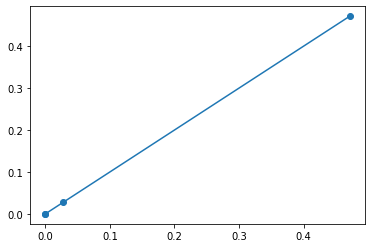

In [12]:
iteracao = 4

E = np.zeros((iteracao+1,2))
e = np.zeros((iteracao+1))
f = np.zeros((iteracao))

resposta = [-1, 2]

for i in range(iteracao+1):

    E[i] = x_view_1[i] - resposta[0]
    e[i] = math.sqrt(E[i,0]**2+E[i,1]**2)

for j in range(iteracao):
    f[j] = e[j+1]

plt.plot(f,e[1:],marker='o')
plt.show()